# NIPS 2017 Figure 3

In [291]:
%run -i NIPS2017.ipynb

# FIGURE and GRID
FIG_HEIGHT_MM = 90
FIG_WIDTH_MM = FIG_WIDTH_MM  # set in NIPS2017 notebook to a default value for all figures
FIG_N_ROWS = 3
ROW_1_NCOLS = 3
ROW_1_HEIGHT_MM = FIG_HEIGHT_MM / FIG_N_ROWS
ROW_1_WIDTH_COL_1_MM = FIG_WIDTH_MM / ROW_1_NCOLS
ROW_1_WIDTH_COL_2_MM = 0.8*FIG_WIDTH_MM / ROW_1_NCOLS
ROW_1_WIDTH_COL_3_MM = 1.2*FIG_WIDTH_MM / ROW_1_NCOLS
# ROW_2_NCOLS = 2
ROW_2_NCOLS = 1
ROW_2_HEIGHT_MM = FIG_HEIGHT_MM / FIG_N_ROWS
ROW_2_WIDTH_COL_1_MM = FIG_WIDTH_MM / ROW_2_NCOLS
ROW_3_NCOLS = 3
ROW_3_HEIGHT_MM = FIG_HEIGHT_MM / FIG_N_ROWS
ROW_3_WIDTH_COL_1_MM = FIG_WIDTH_MM / ROW_3_NCOLS
ROW_3_WIDTH_COL_2_MM = 0.8*FIG_WIDTH_MM / ROW_3_NCOLS
ROW_3_WIDTH_COL_3_MM = 1.2*FIG_WIDTH_MM / ROW_3_NCOLS

# PATHS
PANEL_A = PATH_DROPBOX_FIGS + 'fig3_a.svg'
PANEL_B = PATH_DROPBOX_FIGS + 'fig3_b.svg'
PANEL_C = PATH_DROPBOX_FIGS + 'fig3_c.svg'
PANEL_D = PATH_DROPBOX_FIGS + 'fig3_d.svg'
PANEL_E = PATH_DROPBOX_FIGS + 'fig3_e.svg'
PANEL_F = PATH_DROPBOX_FIGS + 'fig3_f.svg'
PANEL_G = PATH_DROPBOX_FIGS + 'fig3_g.svg'
# PANEL_H = PATH_DROPBOX_FIGS + 'fig3_h.svg'

# SUPPLEMENTARY FIGS
SUPP_SYN = 'supp_fig_hh_syn'  # name for appendix figure : syn data posterior, w/o file extensions
SUPP_REAL = 'supp_fig_hh_real'  # name for appendix figure : real data posterior, w/o file extensions

## Row 1

Load data for row 1

In [162]:
prefix = 'hh_1000_iwloss_svi_cyth_seed1_v3pa01'

dists, infos, losses, nets, posteriors, sims = io.load_prefix(dirs['dir_nets_hh'], prefix)
sim = io.last(sims)
obs_stats = sim.obs
y_obs = sim.obs_trace.reshape(-1,1)
gt = sim.true_params
labels_params = sim.labels_params
param_invtransform = sim.param_invtransform
param_transform = sim.param_transform
gt_transf = param_transform(gt)
n_params = sim.n_params
prior_min = sim.prior_min
prior_max = sim.prior_max
prior_lims = np.concatenate((prior_min.reshape(-1,1),prior_max.reshape(-1,1)),axis=1)
t = sim.t
I = sim.I_obs
A_soma = sim.A_soma
dt = sim.dt
duration = np.max(t)
posterior = io.nth(posteriors, -1)
bm = sim.bm
init = sim.init

m, S = posterior.calc_mean_and_cov()
diff_params = np.divide(param_invtransform(m)-gt,gt)
err_params_up_norm = np.divide( (param_invtransform(m+np.sqrt(np.diag(S))) - param_invtransform(m)) , gt )
err_params_down_norm = np.divide( param_invtransform(m) - param_invtransform(m-np.sqrt(np.diag(S))) , gt )

### Panel A

In [ ]:
# matplotlib takes figsize specified as inches
# in NIPS2016 SCALE_IN and the conversion function are defined
fig_inches = (SCALE_IN*mm2inches(ROW_1_WIDTH_COL_1_MM), SCALE_IN*mm2inches(0.95*ROW_1_HEIGHT_MM))

with mpl.rc_context(fname=MPL_RC):
    fig = plt.figure(figsize=fig_inches)

    gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    ax = plt.subplot(gs[0])
    plt.plot(t, y_obs, color = COL['GT'], lw=2, label='')
    plt.ylabel('voltage (mV)')
    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')

    ax.set_xticks([])
    ax.set_yticks([-80, -20, 40])

    ax = plt.subplot(gs[1])
    plt.plot(t,I*A_soma*1e3,color = COL['EFREE'], lw=2)
    plt.xlabel('time (ms)')
    plt.ylabel('input (nA)')

    ax.set_xticks([0, duration/2, duration])
    ax.set_yticks([0, 1.1*np.max(I*A_soma*1e3)])
    ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))

    plt.savefig(PANEL_A, facecolor='None', transparent=True)  # the figure is saved as svg
    plt.close()

svg(PANEL_A)

panel = st.fromfile(PANEL_A)
width, height = panel.get_size()
print('size of svg : {}'.format((width, height)))
print('aspect ratio : {}'.format(get_num(width) / get_num(height)))
print('desired ratio : {}'.format(ROW_1_WIDTH_COL_1_MM / ROW_1_HEIGHT_MM))

### Panel B

In [ ]:
%run -i NIPS2017.ipynb

# matplotlib takes figsize specified as inches
# in NIPS2016 SCALE_IN and the conversion function are defined
fig_inches = (SCALE_IN*mm2inches(0.8*ROW_1_WIDTH_COL_2_MM), SCALE_IN*mm2inches(ROW_1_HEIGHT_MM))

with mpl.rc_context(fname=MPL_RC):
    plot_pdf(posterior, lims=prior_lims, gt=gt_transf, labels_params=LABELS_HH, partial=True,
             figsize=fig_inches,fontscale=0.6,ticks = False)
    plt.savefig(PANEL_B, facecolor='None', transparent=True)  # the figure is saved as svg
    plt.close()
    
svg(PANEL_B)

panel = st.fromfile(PANEL_B)
width, height = panel.get_size()
print('size of svg : {}'.format((width, height)))
print('aspect ratio : {}'.format(get_num(width) / get_num(height)))
#print('desired ratio : {}'.format(ROW_1_WIDTH_COL_1_MM / ROW_1_HEIGHT_MM))

In [ ]:
SUPP_FIG_SVG = PATH_DROPBOX_FIGS + SUPP_SYN + '.svg'
SUPP_FIG_PDF = PATH_DROPBOX_FIGS + SUPP_SYN + '.pdf'

fig_inches = (SCALE_IN*mm2inches(FIG_WIDTH_MM), SCALE_IN*mm2inches(FIG_WIDTH_MM))

with mpl.rc_context(fname=MPL_RC):
    fig = plt.figure(figsize=fig_inches)

    plot_pdf(posterior, lims=prior_lims, labels_params=LABELS_HH, partial=False, gt=gt_transf,
             figsize=fig_inches,fontscale=0.6)

    plt.savefig(SUPP_FIG_SVG, facecolor='None', transparent=True)  # the figure is saved as svg
    plt.close()
    
svg(SUPP_FIG_SVG)

panel = st.fromfile(SUPP_FIG_SVG)
width, height = panel.get_size()
print('size of svg : {}'.format((width, height)))
print('aspect ratio : {}'.format(get_num(width) / get_num(height)))

!$INKSCAPE --export-pdf $SUPP_FIG_PDF $SUPP_FIG_SVG

### Panel C

In [ ]:
# matplotlib takes figsize specified as inches
# in NIPS2016 SCALE_IN and the conversion function are defined
fig_inches = (SCALE_IN*mm2inches(ROW_1_WIDTH_COL_3_MM), SCALE_IN*mm2inches(ROW_1_HEIGHT_MM))

with mpl.rc_context(fname=MPL_RC):
    fig = plt.figure(figsize=fig_inches)

    num_samp = 3
    num_colors = num_samp+1
    cm1 = mpl.cm.Oranges
    col1 = [cm1(1.*i/num_colors) for i in range(num_colors)]

    # sampling at contour of 1 covariance away from mean
    x_samp = np.random.randn(n_params,num_samp)
    x_samp = np.divide(x_samp,np.linalg.norm(x_samp,axis=0))
    x_samp = (np.dot(S,x_samp)).T+m

    params = np.concatenate((np.array([param_invtransform(m)]),param_invtransform(x_samp)))

    V = np.zeros((len(t),1+num_samp))
    for i in range(1+num_samp):
        hh = bm.HH(init, params[i,:].reshape(1,-1),seed=230+i)
        V[:,i] = hh.sim_time(dt, t, I)[:,0]
        if i>0:
            plt.plot(t, V[:, i], color = col1[i-1], lw=2, label='sample '+str(num_samp-i+1))

    # plotting simulation
    plt.plot(t, V[:, 0], color=COL['SNPE'], lw=2, label='mode')
    plt.plot(t, y_obs, color=COL['GT'], lw=2, label='observation')
    plt.xlabel('time (ms)')
    plt.ylabel('voltage (mV)')

    ax = plt.gca()
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.3, 1), loc='upper right')

    ax.set_xticks([0, duration/2, duration])
    ax.set_yticks([-80, -20, 40])

    plt.savefig(PANEL_C, facecolor=plt.gcf().get_facecolor(), transparent=True)  # the figure is saved as svg
    plt.close()

svg(PANEL_C)

panel = st.fromfile(PANEL_C)
width, height = panel.get_size()
print('size of svg : {}'.format((width, height)))
print('aspect ratio : {}'.format(get_num(width) / get_num(height)))
print('desired ratio : {}'.format(ROW_1_WIDTH_COL_1_MM / ROW_1_HEIGHT_MM))

## Row 2

Load data for row 2 (comparisons against other methods)

In [292]:
# load snpe data
prefix = 'hh_1000_iwloss_svi_cyth_seed2_v3pa01'
dists, infos, losses, nets, posteriors, sims = io.load_prefix(dirs['dir_nets_hh'], prefix)
sim = io.last(sims)
obs_stats = sim.obs
y_obs = sim.obs_trace.reshape(-1,1)
gt = sim.true_params
labels_params = sim.labels_params
param_invtransform = sim.param_invtransform
param_transform = sim.param_transform
gt_transf = param_transform(gt)
n_params = sim.n_params
prior_min = sim.prior_min
prior_max = sim.prior_max
prior_lims = np.concatenate((prior_min.reshape(-1,1),prior_max.reshape(-1,1)),axis=1)
t = sim.t
I = sim.I_obs
A_soma = sim.A_soma
dt = sim.dt
duration = np.max(t)
posterior = io.nth(posteriors, -1)
bm = sim.bm
init = sim.init

n_summary_stats = sim.n_summary_stats
labels_sum_stats = sim.labels_sum_stats

# load efree data
prefix_ef = 'hh_1000_svi_cyth_seed1'  # efree
dists_ef, infos_ef, losses_ef, nets_ef, posteriors_ef, sims_ef = io.load_prefix(dirs['dir_nets_hh'], prefix_ef)
l_sims_ef = io.last(sims_ef)
posterior_ef = io.nth(posteriors_ef, 0)

# ibea
prefix_ibea = prefix + '_ibea'
_, halloffame, log, _ = io.load(dirs['dir_genetic_hh'] + prefix_ibea + '.pkl')
best_params_ibea = halloffame[0]
best_sumstats_ibea = best_params_ibea.fitness.values
hlf_ibea = np.asarray(best_params_ibea)

# compute differences between true parameters and modes
# norm_diff = 0: normalized by true parameters; norm_diff = 1: normalized by SNPE posterior stds
norm_diff = 1

if norm_diff == 0:
    # SNPE
    m, S = posterior.calc_mean_and_cov()
    diff_params = np.abs(np.divide(param_invtransform(m)-gt,gt))
    err_params_up_norm = np.divide((param_invtransform(m+np.sqrt(np.diag(S))) - param_invtransform(m)), gt)
    err_params_down_norm = np.divide(param_invtransform(m) - param_invtransform(m-np.sqrt(np.diag(S))), gt)

    # epsilon-free
    m_ef, S_ef = posterior_ef.calc_mean_and_cov()
    diff_params_ef = np.abs(np.divide(param_invtransform(m_ef)-gt,gt))
    err_params_up_norm_ef = np.divide((param_invtransform(m_ef+np.sqrt(np.diag(S_ef))) - param_invtransform(m_ef)), gt)
    err_params_down_norm_ef = np.divide(param_invtransform(m_ef) - param_invtransform(m_ef-np.sqrt(np.diag(S_ef))), gt )

    # ibea
    diff_params_ibea = np.abs(np.divide(hlf_ibea-gt,gt))
    err_params_ibea = np.divide(np.std(halloffame,0) , gt )

    # re-order
    # sort_indices = np.argsort(diff_params-diff_params_ibea)
    sort_indices = np.flip(np.argsort(diff_params_ibea), axis=0)
    labels_params_sort = [LABELS_HH[i] for i in sort_indices]

    min_m = np.min([np.min(diff_params-err_params_down_norm),
                    np.min(diff_params_ef-err_params_down_norm_ef),
                    np.min(diff_params_ibea-err_params_ibea)])
    max_m = np.max([np.max(diff_params+err_params_up_norm),
                    np.max(diff_params_ef+err_params_up_norm_ef),
                    np.max(diff_params_ibea+err_params_ibea)])
else:
    # SNPE
    m, S = posterior.calc_mean_and_cov()
    diff_params = np.abs( np.divide( m-gt_transf,np.sqrt(np.diag(S)) ) )

    # epsilon-free
    m_ef, S_ef = posterior_ef.calc_mean_and_cov()
    diff_params_ef = np.abs( np.divide( m_ef-gt_transf,np.sqrt(np.diag(S)) ) )

    # ibea
    diff_params_ibea = np.abs( np.divide( param_transform(hlf_ibea)-gt_transf,np.sqrt(np.diag(S)) ) )

    # re-order
    # sort_indices = np.argsort(diff_params-diff_params_ibea)
    sort_indices = np.flip(np.argsort(diff_params_ibea), axis=0)
    labels_params_sort = [LABELS_HH[i] for i in sort_indices]

    min_m = np.min([np.min(diff_params),
                    np.min(diff_params_ef),
                    np.min(diff_params_ibea)])
    max_m = np.max([np.max(diff_params),
                    np.max(diff_params_ef),
                    np.max(diff_params_ibea)])

## Panel D

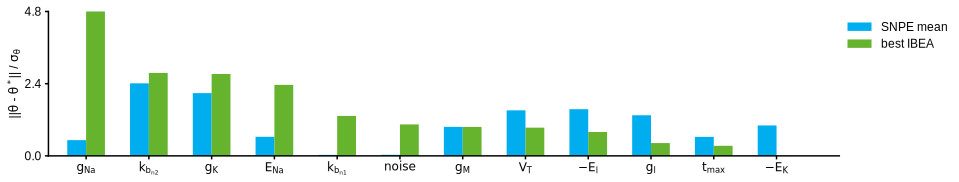

size of svg : ('959pt', '182pt')
aspect ratio : 5.269230769230769
desired ratio : 1.777777777777778


In [293]:
fig_inches = (SCALE_IN*mm2inches(1.*ROW_2_WIDTH_COL_1_MM), SCALE_IN*mm2inches(0.98*ROW_2_HEIGHT_MM))

with mpl.rc_context(fname=MPL_RC, rc={'text.usetex': False}):
    fig = plt.figure(figsize=fig_inches)

    # histogram of differences
    width = 0.3
    if norm_diff == 0:
        plt.bar(np.linspace(0,n_params-1,n_params),
                diff_params[sort_indices],width, color=COL['SNPE'], align='center',
                yerr=[err_params_down_norm[sort_indices],
                      err_params_up_norm[sort_indices]], ecolor='k', edgecolor = 'none', label='SNPE mean')
        #plt.bar(np.linspace(0,n_params-1,n_params)+2*width,
        #        diff_params_ef[sort_indices],width,color=COL['EFREE'], align='center',
        #        yerr=[err_params_down_norm_ef[sort_indices],
        #              err_params_up_norm_ef[sort_indices]], ecolor='k', edgecolor = 'none', label='epsilon-free mean')
        plt.bar(np.linspace(0,n_params-1,n_params)+1*width,
                diff_params_ibea[sort_indices],width,color=COL['IBEA'], align='center',
                yerr=[err_params_ibea[sort_indices],err_params_ibea[sort_indices]],
                ecolor='k', edgecolor = 'none', label='best ibea')
        plt.ylabel(r'||$\hat \theta$ - $\theta^*$|| / $\theta^*$')
    else:
        plt.bar(np.linspace(0,n_params-1,n_params),
                diff_params[sort_indices],width, color=COL['SNPE'], align='center',
                edgecolor = 'none', label='SNPE mean')
        #plt.bar(np.linspace(0,n_params-1,n_params)+2*width,
        #        diff_params_ef[sort_indices],width,color=COL['EFREE'], align='center',
        #        edgecolor = 'none', label='epsilon-free mean')
        plt.bar(np.linspace(0,n_params-1,n_params)+1*width,
                diff_params_ibea[sort_indices],width,color=COL['IBEA'], align='center',
                edgecolor = 'none', label='best IBEA')
        plt.ylabel(r'||$\theta$ - $\theta^*$|| / $\sigma_{\theta}$')

    ax = plt.gca()
    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
    ax.set_xlim(-1.5*width,n_params+width/2)
    ax.set_xticks(np.linspace(0,n_params-1,n_params)+width/2)
    ax.set_ylim([0, max_m])
    ax.set_yticks(np.linspace(0,max_m,3))
    ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))
    ax.set_xticklabels(labels_params_sort)

    plt.savefig(PANEL_D, facecolor='None', transparent=True)  # the figure is saved as svg
    plt.close()

svg(PANEL_D)

panel = st.fromfile(PANEL_D)
width, height = panel.get_size()
print('size of svg : {}'.format((width, height)))
print('aspect ratio : {}'.format(get_num(width) / get_num(height)))
print('desired ratio : {}'.format(ROW_1_WIDTH_COL_1_MM / ROW_1_HEIGHT_MM))

In [289]:
# # compute differences between observed summary features and summary features of modes
# # SNPE
# m, S = posterior.calc_mean_and_cov()

# # run simulations to estimate standard deviation for each summary statistic in the SNPE case
# num_samp1 = 10

# # sampling at contour of 1 covariance away from mean
# x_samp = np.random.randn(n_params,num_samp1)
# x_samp = np.divide(x_samp,np.linalg.norm(x_samp,axis=0))
# x_samp = (np.dot(S,x_samp)).T+m

# params_samp = param_invtransform(x_samp)
# sum_stats_samp = np.zeros((n_summary_stats,num_samp1))
# for i in range(num_samp1):
#     hh = bm.HH(init, params_samp[i,:].reshape(1,-1))
#     states = hh.sim_time(dt, t, I)[:,0]
#     sum_stats_samp[:,i] = sim.calc_summary_stats(states.reshape(1, -1, 1))


# sum_stats_samp_std = np.std(sum_stats_samp,axis=1)

# hh = bm.HH(init, param_invtransform(m).reshape(1,-1))
# states = hh.sim_time(dt, t, I)[:,0]
# mode_sum_stats = sim.calc_summary_stats(states.reshape(1, -1, 1))[0,:]

# # diff_sum_stats = np.abs(np.divide(mode_sum_stats-obs_stats,sum_stats_samp_std))
# diff_sum_stats = np.abs(mode_sum_stats-obs_stats[0,:])


# # ibea
# hh = bm.HH(init, hlf_ibea.reshape(1,-1))
# states = hh.sim_time(dt, t, I)[:,0]
# sum_stats_ibea = sim.calc_summary_stats(states.reshape(1, -1, 1))[0,:]

# # diff_sum_stats_ibea = np.abs(np.divide(sum_stats_ibea-obs_stats,sum_stats_samp_std))
# diff_sum_stats_ibea = np.abs(sum_stats_ibea-obs_stats[0,:])


# # re-order
# # sort_indices = np.argsort(diff_sum_stats-diff_sum_stats_ibea)
# sort_indices = np.flip(np.argsort(diff_sum_stats_ibea), axis=0)

# min_m = np.min([np.min(diff_sum_stats),
#                 np.min(diff_sum_stats_ibea)])
# max_m = np.max([np.max(diff_sum_stats),
#                 np.max(diff_sum_stats_ibea)])

## FORMER Panel E

In [290]:
# fig_inches = (SCALE_IN*mm2inches(1.*ROW_2_WIDTH_COL_1_MM), SCALE_IN*mm2inches(0.98*ROW_2_HEIGHT_MM))

# with mpl.rc_context(fname=MPL_RC, rc={'text.usetex': False}):
#     fig = plt.figure(figsize=fig_inches)

#     # histogram of differences
#     width = 0.3
#     plt.bar(np.linspace(0,n_summary_stats-1,n_summary_stats),
#             diff_sum_stats[sort_indices],width, color=COL['SNPE'], align='center',
#             edgecolor = 'none', label='SNPE mean')
#     plt.bar(np.linspace(0,n_summary_stats-1,n_summary_stats)+1*width,
#             diff_sum_stats_ibea[sort_indices],width,color=COL['IBEA'], align='center',
#             edgecolor = 'none', label='best IBEA')
#     plt.ylabel(r'||f - $f^*$||')

#     ax = plt.gca()
# #     plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
#     ax.set_xlim(-1.5*width,n_summary_stats+width/2)
#     ax.set_xticks(np.linspace(0,n_summary_stats-1,n_summary_stats)+width/2)
#     ax.set_ylim([0, max_m])
#     ax.set_yticks(np.linspace(0,max_m,3))
#     ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.1f'))
#     ax.set_xticklabels(np.linspace(1,n_summary_stats,n_summary_stats).astype(int))
    
#     plt.savefig(PANEL_E, facecolor='None', transparent=True)  # the figure is saved as svg
#     plt.close()

# svg(PANEL_E)

# panel = st.fromfile(PANEL_E)
# width, height = panel.get_size()
# print('size of svg : {}'.format((width, height)))
# print('aspect ratio : {}'.format(get_num(width) / get_num(height)))
# print('desired ratio : {}'.format(ROW_1_WIDTH_COL_1_MM / ROW_1_HEIGHT_MM))

## Row 3

Load data for row 3

In [294]:
prefix_realdata = 'hh_1000_iwloss_svi_cyth_realdata_seed1_v3pa01'  # ours, real data

dists, infos, losses, nets, posteriors, sims = io.load_prefix(dirs['dir_nets_hh'], prefix_realdata)
sim = io.last(sims)
obs_stats = sim.obs
y_obs = sim.obs_trace.reshape(-1,1)
gt = sim.true_params
labels_params = sim.labels_params
param_invtransform = sim.param_invtransform
param_transform = sim.param_transform
gt_transf = param_transform(gt)
n_params = sim.n_params
prior_min = sim.prior_min
prior_max = sim.prior_max
prior_lims = np.concatenate((prior_min.reshape(-1,1),prior_max.reshape(-1,1)),axis=1)
t = sim.t
I = sim.I_obs
A_soma = sim.A_soma
dt = sim.dt
duration = np.max(t)
posterior = io.last(posteriors)
bm = sim.bm
init = sim.init

m, S = posterior.calc_mean_and_cov()
diff_params = np.divide(param_invtransform(m)-gt,gt)
err_params_up_norm = np.divide( (param_invtransform(m+np.sqrt(np.diag(S))) - param_invtransform(m)) , gt )
err_params_down_norm = np.divide( param_invtransform(m) - param_invtransform(m-np.sqrt(np.diag(S))) , gt )

### Panel E

/home/pedro/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


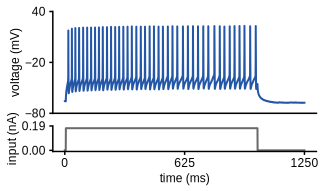

size of svg : ('327pt', '191pt')
aspect ratio : 1.712041884816754
desired ratio : 1.777777777777778


In [295]:
# matplotlib takes figsize specified as inches
# in NIPS2016 SCALE_IN and the conversion function are defined
fig_inches = (SCALE_IN*mm2inches(ROW_3_WIDTH_COL_1_MM), SCALE_IN*mm2inches(0.95*ROW_3_HEIGHT_MM))

with mpl.rc_context(fname=MPL_RC):
    fig = plt.figure(figsize=fig_inches)

    gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[4, 1])
    ax = plt.subplot(gs[0])
    plt.plot(t, y_obs, color = COL['GT'], lw=2, label='')
    plt.ylabel('voltage (mV)')
    plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')

    ax.set_xticks([])
    ax.set_yticks([-80, -20, 40])

    ax = plt.subplot(gs[1])
    plt.plot(t,I*A_soma*1e3, color = COL['EFREE'], lw=2)
    plt.xlabel('time (ms)')
    plt.ylabel('input (nA)')

    ax.set_xticks([0, duration/2, duration])
    ax.set_yticks([0, 1.1*np.max(I*A_soma*1e3)])
    ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%.2f'))

    plt.savefig(PANEL_E, facecolor='None', transparent=True)  # the figure is saved as svg
    plt.close()

svg(PANEL_E)

panel = st.fromfile(PANEL_E)
width, height = panel.get_size()
print('size of svg : {}'.format((width, height)))
print('aspect ratio : {}'.format(get_num(width) / get_num(height)))
print('desired ratio : {}'.format(ROW_1_WIDTH_COL_1_MM / ROW_1_HEIGHT_MM))

### Panel F

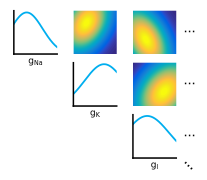

size of svg : ('207pt', '180pt')
aspect ratio : 1.15
desired ratio : 1.422222222222222


In [296]:
fig_inches = (SCALE_IN*mm2inches(0.8*ROW_3_WIDTH_COL_2_MM), SCALE_IN*mm2inches(ROW_3_HEIGHT_MM))

with mpl.rc_context(fname=MPL_RC):
    fig = plt.figure(figsize=fig_inches)

    plot_pdf(posterior, lims=prior_lims, labels_params=LABELS_HH, partial=True,
             figsize=fig_inches,fontscale=0.6)

    plt.savefig(PANEL_F, facecolor='None', transparent=True)  # the figure is saved as svg
    plt.close()
    
svg(PANEL_F)

panel = st.fromfile(PANEL_F)
width, height = panel.get_size()
print('size of svg : {}'.format((width, height)))
print('aspect ratio : {}'.format(get_num(width) / get_num(height)))
print('desired ratio : {}'.format(ROW_2_WIDTH_COL_2_MM / ROW_2_HEIGHT_MM))

Supplement version

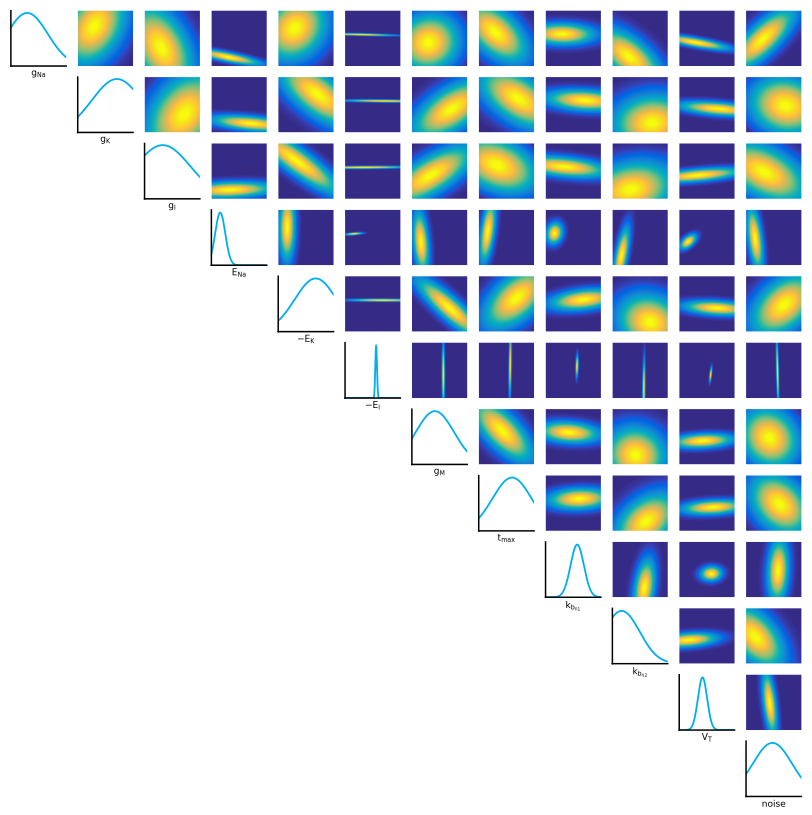

size of svg : ('812pt', '815pt')
aspect ratio : 0.996319018404908


In [297]:
SUPP_FIG_SVG = PATH_DROPBOX_FIGS + SUPP_REAL + '.svg'
SUPP_FIG_PDF = PATH_DROPBOX_FIGS + SUPP_REAL + '.pdf'

fig_inches = (SCALE_IN*mm2inches(FIG_WIDTH_MM), SCALE_IN*mm2inches(FIG_WIDTH_MM))

with mpl.rc_context(fname=MPL_RC):
    fig = plt.figure(figsize=fig_inches)

    plot_pdf(posterior, lims=prior_lims, labels_params=LABELS_HH, partial=False,
             figsize=fig_inches,fontscale=0.6)

    plt.savefig(SUPP_FIG_SVG, facecolor='None', transparent=True)  # the figure is saved as svg
    plt.close()
    
svg(SUPP_FIG_SVG)

panel = st.fromfile(SUPP_FIG_SVG)
width, height = panel.get_size()
print('size of svg : {}'.format((width, height)))
print('aspect ratio : {}'.format(get_num(width) / get_num(height)))

!$INKSCAPE --export-pdf $SUPP_FIG_PDF $SUPP_FIG_SVG

### Panel G

In [298]:
# matplotlib takes figsize specified as inches
# in NIPS2016 SCALE_IN and the conversion function are defined
fig_inches = (SCALE_IN*mm2inches(ROW_3_WIDTH_COL_3_MM), 0.95*SCALE_IN*mm2inches(ROW_3_HEIGHT_MM))

with mpl.rc_context(fname=MPL_RC):
    fig = plt.figure(figsize=fig_inches)

    num_samp = 3
    num_colors = num_samp+1
    cm1 = mpl.cm.Oranges
    col1 = [cm1(1.*i/num_colors) for i in range(num_colors)]

    # sampling at contour of 1 covariance away from mean
    x_samp = np.random.randn(n_params,num_samp)
    x_samp = np.divide(x_samp,np.linalg.norm(x_samp,axis=0))
    x_samp = (np.dot(S,x_samp)).T+m

    params = np.concatenate((np.array([param_invtransform(m)]),param_invtransform(x_samp)))

    V = np.zeros((len(t),1+num_samp))
    for i in range(1+num_samp):
        hh = bm.HH(init, params[i,:].reshape(1,-1),seed=230+i)
        V[:,i] = hh.sim_time(dt, t, I)[:,0]
        if i>0:
            plt.plot(t, V[:, i], color = col1[i-1], lw=2, label='sample '+str(num_samp-i+1))

    # plotting simulation
    plt.plot(t, V[:, 0], color=COL['SNPE'], lw=2, label='mode')
    plt.plot(t, y_obs, color=COL['GT'], lw=2, label='original')
    plt.xlabel('time (ms)')
    plt.ylabel('voltage (mV)')

    ax = plt.gca()
    #handles, labels = ax.get_legend_handles_labels()
    #ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.3, 1), loc='upper right')

    ax.set_xticks([0, duration/2, duration])
    ax.set_yticks([-80, -20, 40])

    plt.savefig(PANEL_G, facecolor=plt.gcf().get_facecolor(), transparent=True)  # the figure is saved as svg
    plt.close()

svg(PANEL_G)

panel = st.fromfile(PANEL_G)
width, height = panel.get_size()
print('size of svg : {}'.format((width, height)))
print('aspect ratio : {}'.format(get_num(width) / get_num(height)))
print('desired ratio : {}'.format(ROW_2_WIDTH_COL_3_MM / ROW_2_HEIGHT_MM))

size of svg : ('376pt', '191pt')
aspect ratio : 1.968586387434555
desired ratio : 2.1333333333333333


## Compose figure

In [299]:
fig = create_fig(FIG_WIDTH_MM, FIG_HEIGHT_MM)

if False:
    fig = add_grid(fig, 2, 2)
    fig = add_grid(fig, 160/3, 10, font_size_px=0.0001)

yoffset = -1.2
xoffset = -1.
fig = add_svg(fig, PANEL_A, 0 + xoffset, 0 + yoffset)
fig = add_svg(fig, PANEL_B, ROW_1_WIDTH_COL_1_MM + xoffset + 5, 0 + yoffset)
fig = add_svg(fig, PANEL_C, ROW_1_WIDTH_COL_1_MM + ROW_1_WIDTH_COL_2_MM + xoffset, 0 + yoffset)
fig = add_svg(fig, PANEL_D, 0 + xoffset, ROW_2_HEIGHT_MM + yoffset)
# fig = add_svg(fig, PANEL_E, ROW_2_WIDTH_COL_1_MM + xoffset, ROW_2_HEIGHT_MM + yoffset)
fig = add_svg(fig, PANEL_E, 0 + xoffset, ROW_1_HEIGHT_MM + ROW_2_HEIGHT_MM + yoffset)
fig = add_svg(fig, PANEL_F, ROW_3_WIDTH_COL_1_MM + xoffset + 5, ROW_1_HEIGHT_MM + ROW_2_HEIGHT_MM + yoffset - 0.1)
fig = add_svg(fig, PANEL_G, ROW_3_WIDTH_COL_1_MM + ROW_3_WIDTH_COL_2_MM + xoffset + 1., ROW_1_HEIGHT_MM + ROW_2_HEIGHT_MM + yoffset)

yoffset = 2.3
fig = add_label(fig, 'A', 0, 0 + yoffset)
fig = add_label(fig, 'B', ROW_1_WIDTH_COL_1_MM, 0 + yoffset)
fig = add_label(fig, 'C', ROW_1_WIDTH_COL_1_MM + ROW_1_WIDTH_COL_2_MM, 0 + yoffset)
yoffset = 1.5
fig = add_label(fig, 'D', 0, ROW_2_HEIGHT_MM + yoffset)
# fig = add_label(fig, 'E', ROW_2_WIDTH_COL_1_MM, ROW_2_HEIGHT_MM + yoffset)
yoffset = 1.5
fig = add_label(fig, 'E', 0, ROW_1_HEIGHT_MM + ROW_2_HEIGHT_MM + yoffset)
fig = add_label(fig, 'F', ROW_3_WIDTH_COL_1_MM, ROW_1_HEIGHT_MM + ROW_2_HEIGHT_MM + yoffset)
fig = add_label(fig, 'G', ROW_3_WIDTH_COL_1_MM + ROW_3_WIDTH_COL_2_MM, ROW_1_HEIGHT_MM + ROW_2_HEIGHT_MM + yoffset)

PATH_SVG = PATH_DROPBOX_FIGS + 'fig3.svg'
fig.save(PATH_SVG)

#svg(PATH_SVG)

!$INKSCAPE --export-pdf $PATH_DROPBOX_FIGS/fig3.pdf $PATH_SVG